# Titanic Project Report


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv("/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/data/train.csv")
test = pd.read_csv("/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/data/test.csv")

print('number of data points:',df.shape[0] + test.shape[0])
df.shape

number of data points: 1309


(891, 12)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [3]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

By counting the number of unique elements in each column, we can conclude that “PassengerId” and “Name” features are unique for each passenger, so we don’t need to visualize these two columns. By using value_counts, I created bar plots for “Cabin”, “Ticket”, and “Embarked” features.

In [4]:
df[['Survived','Pclass','Age','SibSp','Parch','Fare']].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df[['Embarked']].value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

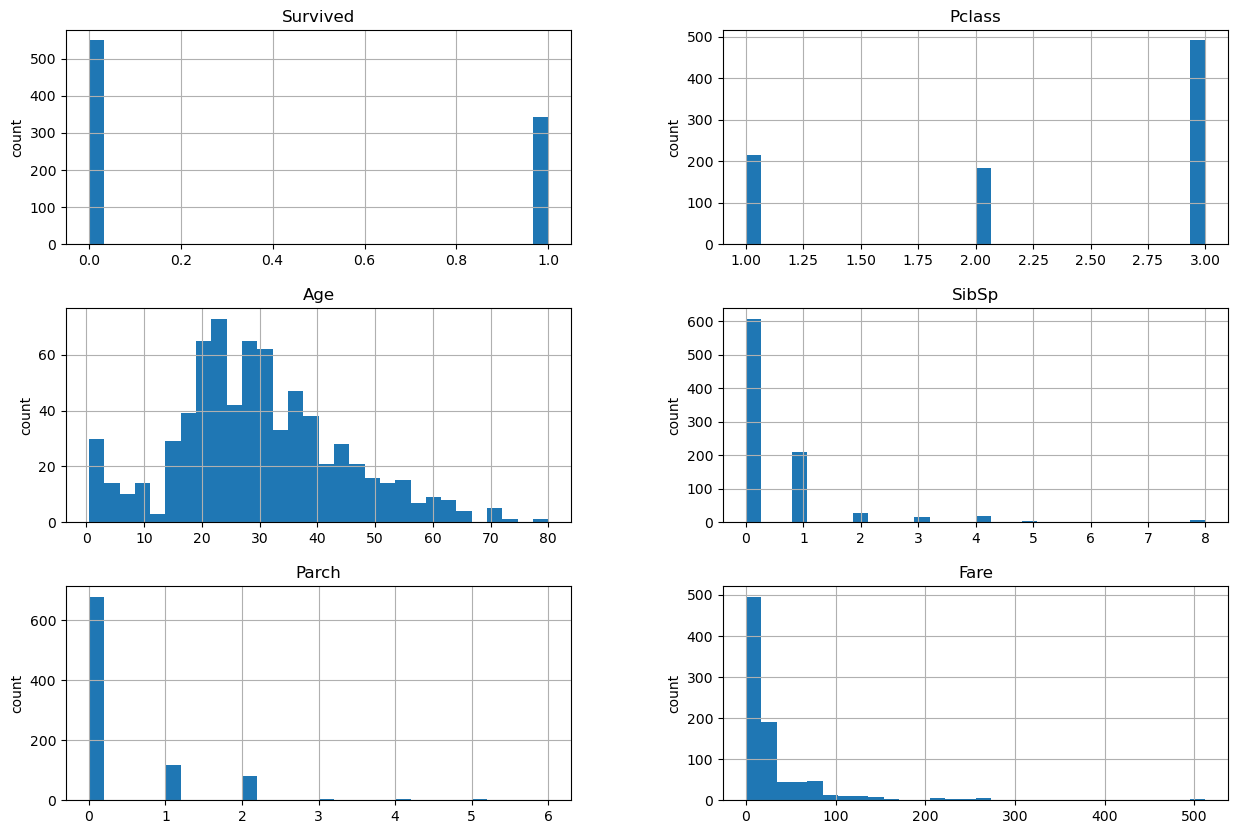

In [6]:
g = df[['Survived','Pclass','Age','SibSp','Parch','Fare']].hist(figsize = (15,10), bins = 30)
for i in g.flatten():
    i.set_ylabel("count")
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Histograms for columns'))

In [7]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


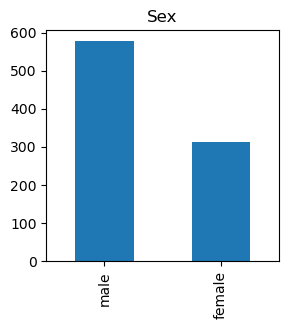

In [8]:
df['Sex'].value_counts().plot(kind = 'bar', title = "Sex", figsize = (3,3))
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('SexDis'))

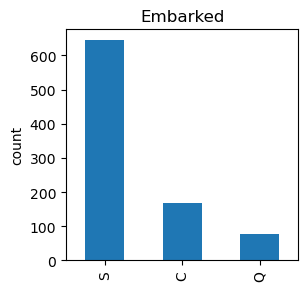

In [9]:
df['Embarked'].value_counts().plot(kind = 'bar', title = "Embarked", figsize = (3,3),ylabel ="count")
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Embarked Distribution'))

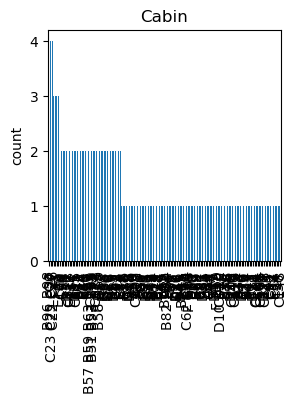

In [10]:
df['Cabin'].value_counts().plot(kind = 'bar', title = "Cabin", figsize = (3,3), ylabel ="count")
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Cabin distribution'))

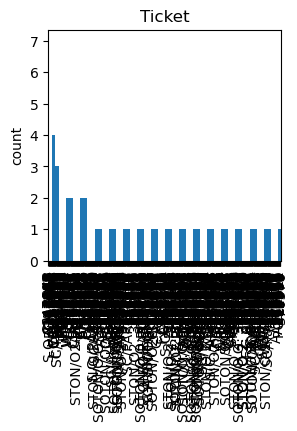

In [11]:
df['Ticket'].value_counts().plot(kind = 'bar', title = "Ticket", figsize = (3,3),ylabel ="count")
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Ticket distribution'))

Since "Name" is unique, we don't have to visualize them.

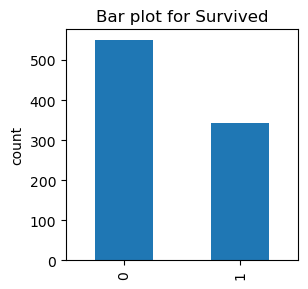

In [12]:
df['Survived'].value_counts().plot(kind = 'bar', title = "Survived", figsize = (3,3),ylabel ="count")
plt.title('Bar plot for Survived')
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Bar plot for Survived'))

In [13]:
print((df.loc[(df['Survived'] == 0)].shape[0])/(df.shape[0]))
print((df.loc[(df['Survived'] == 1)].shape[0])/(df.shape[0]))

0.6161616161616161
0.3838383838383838


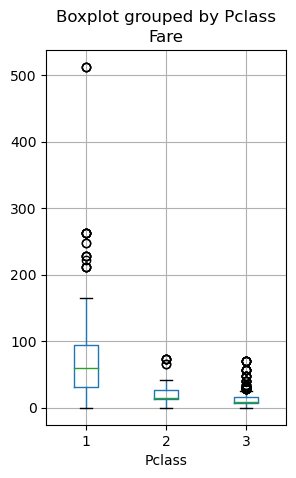

In [14]:
df.boxplot(column = 'Fare', by = 'Pclass', figsize = (3,5))
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Boxplot1'))

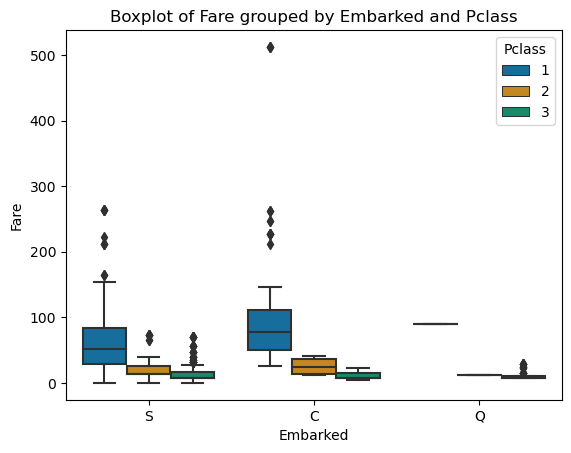

In [15]:
sns.boxplot(y = 'Fare', x = 'Embarked', data = df, palette="colorblind",hue = 'Pclass').set_title("Boxplot of Fare grouped by Embarked and Pclass")
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Boxplot2'))

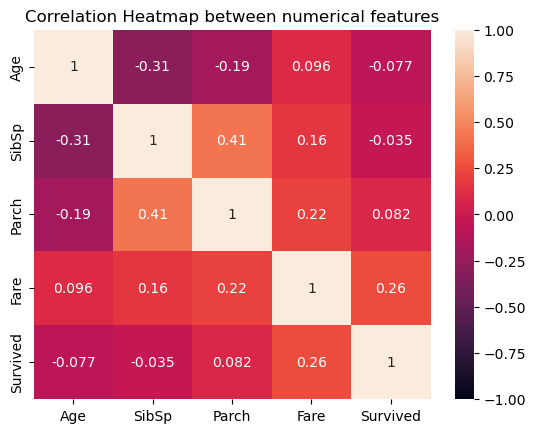

In [16]:
df_num = df[["Age","SibSp","Parch","Fare","Survived"]]
ax = plt.axes()
sns.heatmap(df_num.corr(method='pearson', min_periods=1),vmin=-1,vmax=1,annot=True)
ax.set_title('Correlation Heatmap between numerical features')
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('correlation'))

/var/folders/gn/cyzt_cl51h9ghmxw5hg3hc8w0000gn/T/ipykernel_92270/320418596.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['Survived'] == 0), 'Fare'], color = 'blue', shade = True, label = 'Not survived')
/var/folders/gn/cyzt_cl51h9ghmxw5hg3hc8w0000gn/T/ipykernel_92270/320418596.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['Survived'] == 1), 'Fare'], color = 'green', shade = True, label = 'Survived')


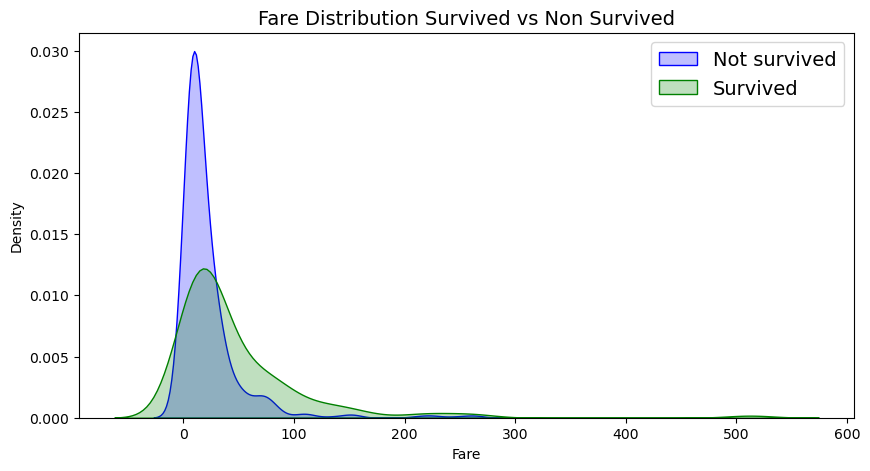

In [17]:
fig = plt.figure(figsize=(10,5),)
ax = sns.kdeplot(df.loc[(df['Survived'] == 0), 'Fare'], color = 'blue', shade = True, label = 'Not survived')
ax = sns.kdeplot(df.loc[(df['Survived'] == 1), 'Fare'], color = 'green', shade = True, label = 'Survived')
ax.legend(fontsize = 14)
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 14)
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Fare Distribution'))

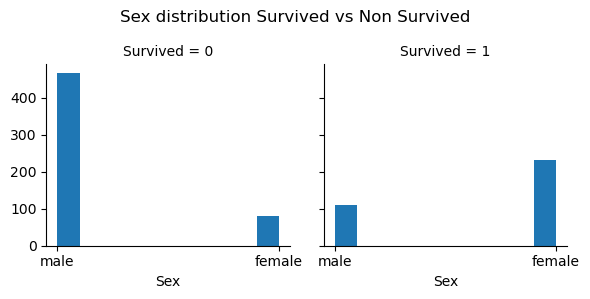

In [18]:
ax= sns.FacetGrid(df, col = 'Survived').map(plt.hist, 'Sex')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle("Sex distribution Survived vs Non Survived")
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Sex Distribution'))

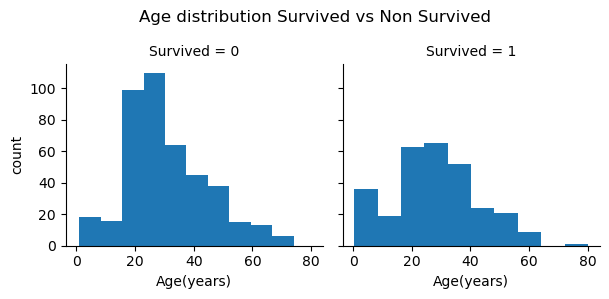

In [19]:
ax= sns.FacetGrid(df, col = 'Survived').map(plt.hist, 'Age')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle("Age distribution Survived vs Non Survived")
ax.axes[0,0].set_xlabel('Age(years)')
ax.axes[0,1].set_xlabel('Age(years)')
ax.axes.flat[0].set_ylabel(ylabel = "count")
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Age distribution'))

## Methods

### Data preprocessing

In [20]:
df.Cabin = df.Cabin.fillna('N')
df.Cabin = [i[0] for i in df.Cabin]
print(df.groupby('Cabin')['Fare'].mean().sort_values())
#print(df.groupby('Cabin')['Fare'].median().sort_values())
#print(df.groupby('Cabin')['Fare'].max())
#print(df.groupby('Cabin')['Fare'].min())

Cabin
G     13.581250
F     18.696792
N     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64


In [21]:
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [22]:
i = 0
while i < len(df):
    if df.loc[i,'Cabin'] =='N':
        if df.loc[i,'Fare'] < 17:
            df.loc[i,'Cabin']  = 'G'
        elif df.loc[i,'Fare'] >= 17 and df.loc[i,'Fare'] < 27:
            df.loc[i,'Cabin']  = 'F'
        elif df.loc[i,'Fare'] >= 27 and df.loc[i,'Fare'] < 37:
            df.loc[i,'Cabin']  = 'T'
        elif df.loc[i,'Fare'] >= 37 and df.loc[i,'Fare'] < 43:
            df.loc[i,'Cabin']  = 'A'
        elif df.loc[i,'Fare'] >= 43 and df.loc[i,'Fare'] < 55:
            df.loc[i,'Cabin']  = 'E'
        elif df.loc[i,'Fare'] >= 55 and df.loc[i,'Fare'] < 90:
            df.loc[i,'Cabin']  = 'D'
        elif df.loc[i,'Fare'] >= 90 and df.loc[i,'Fare'] < 105:
            df.loc[i,'Cabin']  = 'C'
        else:
            df.loc[i,'Cabin']  = 'B'
    i += 1
df.Cabin.value_counts()

G    474
F    118
D     60
C     59
B     57
T     51
E     42
A     30
Name: Cabin, dtype: int64

In [23]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin']]
y = df[['Survived']]
X.is_copy = False

#### Deal with missing values in Age feature

In [24]:
X['Age'].isna().sum()

177

In [25]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

X['Sex'] = X['Sex'].map({"male": 0, "female":1}) 

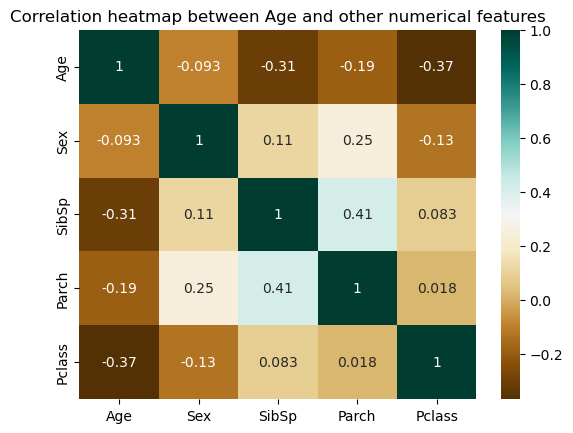

In [26]:
ax = plt.axes()
sns.heatmap(X[["Age",'Sex',"SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)
ax.set_title('Correlation heatmap between Age and other numerical features')
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Age heatmap'))
plt.show()

We can see Age is negatively correlated with Pclass, Parch and SibSp. Thus, replacing missing values in Age features by using these 3 features.

In [27]:
nan_idx = list(X['Age'][X['Age'].isnull()].index)

for i in nan_idx:
    median = X['Age'].median()
    pred = X['Age'][((X['SibSp'] == X.iloc[i]["SibSp"]) & (X['Parch'] == X.iloc[i]["Parch"]) & (X['Pclass'] == X.iloc[i]["Pclass"]))].median()
    if np.isnan(pred):
        X['Age'].iloc[i] = median
    else:
        X['Age'].iloc[i] = pred

/Users/ellaliang/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [28]:
X['Age'].isna().sum()

0

In [29]:
#### Deal with missing values in Embarked feature

In [30]:
#X["Embarked"].value_counts()

In [31]:
#X["Embarked"] = X["Embarked"].fillna("S")

#### Preprocessing

In [32]:
continuous = ['Age','SibSp','Parch','Fare']
categorical = ['Sex','Embarked','Cabin']
ordinal = ['Pclass']

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

#onehot_ftrs = ['Sex','Embarked','Cabin']
onehot_ftrs = ['Embarked','Cabin']
std_ftrs = ['Age','SibSp','Parch','Fare']
ordinal_ftrs = ['Pclass']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('ordinal', OrdinalEncoder(), ordinal_ftrs),
        ('std', StandardScaler(), std_ftrs)])

# clf = Pipeline(steps=[('preprocessor', preprocessor)])
# X_train_prep = clf.fit_transform(X_train)
# X_test_prep = clf.transform(X_test)
# X_val_prep = clf.transform(X_val)

# print(X_train.shape)
# print(X_train_prep.shape)
# X_train_prep

### ML pipeline

#### Algorithm 1: Logistic Regression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
import warnings
warnings.filterwarnings('ignore')

penalties =[['l1'],['l2'],['elasticnet'],['none']]
solvers_none = ['newton-cg', 'lbfgs', 'sag','saga']
solvers_l2 = ['newton-cg', 'lbfgs', 'sag','saga','liblinear']
solvers_ela =['saga']
solvers_l1 = ['liblinear']
max_iter = 10000
#solvers = ['newton-cg', 'lbfgs', 'sag','sage','liblinear']
lst_solvers = [solvers_l1,solvers_l2,solvers_ela,solvers_none]
c_values = [100, 10, 1.0, 0.1, 0.01]
best_models = []
test_scores_lr = []
for i in range(10):
    logReg = LogisticRegression()
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=i)
    
    clf = Pipeline(steps=[('preprocessor', preprocessor)])
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    
    cv = KFold(n_splits=5,shuffle=True,random_state=i)
    
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    best = 0
    best_param = []
    best_model = []
    for i in range(4):
        solver = lst_solvers[i]
        penalty = penalties[i]
        if i == 2:
            grid = dict(solver=solver,penalty=penalty,C=c_values,max_iter = [10000],l1_ratio = [0.6])
        elif i == 3:
            grid = dict(solver=solver,penalty=penalty,max_iter = [10000])
        else:
            grid = dict(solver=solver,penalty=penalty,C=c_values,max_iter = [10000])
        grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=5, cv = cv, scoring='roc_auc',error_score='raise')
        grid_result = grid_search.fit(X_train_prep, y_train)

        if grid_result.best_score_ > best:
            best_param=grid_result.best_params_
            best = grid_result.best_score_
            best_model = grid_result.best_estimator_
    best_models.append(best_model)
    print('--------------------------------------------------------')
    print('Best parameters for logistic regression: ')
    print(best_param)
    print('Best train score:', best)
    print('Best test score:', best_model.score(X_test_prep, y_test))
    test_scores_lr.append(best_model.score(X_test_prep, y_test))

print("-------------------------------------------------")
print("mean of the test scores:", np.mean(test_scores_lr))
print("standard deviation of the test scores:", np.std(test_scores_lr))
mean_lr = np.mean(test_scores_lr)
std_lr = np.std(test_scores_lr)

    

--------------------------------------------------------
Best parameters for logistic regression: 
{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}
Best train score: 0.742425321897002
Best test score: 0.7170868347338936
--------------------------------------------------------
Best parameters for logistic regression: 
{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best train score: 0.7508710134836296
Best test score: 0.6918767507002801
--------------------------------------------------------
Best parameters for logistic regression: 
{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}
Best train score: 0.7428660566249494
Best test score: 0.711484593837535
--------------------------------------------------------
Best parameters for logistic regression: 
{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
Best train score: 0.7726013863116551
Best test score: 0.7030812324929971
-------------------------------------------

In [36]:
feature_names = preprocessor.get_feature_names_out()
len(feature_names)

17

In [37]:
clf_all = Pipeline(steps=[('preprocessor', preprocessor)])
X_pre= clf_all.fit_transform(X)
X_pre.shape

(891, 17)

In [38]:
pre_df = pd.DataFrame(X_pre)
pre_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,-0.545734,0.432793,-0.473674,-0.502445
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655962,0.432793,-0.473674,0.786845
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,-0.245310,-0.474545,-0.473674,-0.488854
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430644,0.432793,-0.473674,0.420730
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.430644,-0.474545,-0.473674,-0.486337


In [40]:
pre_df.columns = feature_names
pre_df.head()

,onehot__Embarked_C,onehot__Embarked_Q,onehot__Embarked_S,onehot__Embarked_nan,onehot__Cabin_A,onehot__Cabin_B,onehot__Cabin_C,onehot__Cabin_D,onehot__Cabin_E,onehot__Cabin_F,onehot__Cabin_G,onehot__Cabin_T,ordinal__Pclass,std__Age,std__SibSp,std__Parch,std__Fare
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,-0.545734,0.432793,-0.473674,-0.502445
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655962,0.432793,-0.473674,0.786845
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,-0.245310,-0.474545,-0.473674,-0.488854
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430644,0.432793,-0.473674,0.420730
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.430644,-0.474545,-0.473674,-0.486337


In [45]:
save_pre = pre_df.to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/data/preprocessed data')

#### Algorithm 2: KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
best_models_knn = []
test_scores_knn = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=i)
    
    clf = Pipeline(steps=[('preprocessor', preprocessor)])
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    
    cv = KFold(n_splits=5,shuffle=True,random_state=i)
    
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    best = 0
    best_param = []
    knn = KNeighborsClassifier()
    knn_grid = {
        'n_neighbors': [1,3,5,10,20] 
    }
    warnings.filterwarnings('ignore', category = FutureWarning)
    grid_search_knn = GridSearchCV(knn, param_grid=knn_grid, cv=cv, scoring = 'roc_auc', n_jobs = 5, verbose = 1)
    grid_search_knn.fit(X_train_prep,y_train)
    print('--------------------------------------------------------')
    print('Best parameters for KNN classification:')
    print(grid_search_knn.best_params_)
    print('Best train score:', grid_search_knn.best_score_)
    best_knn = grid_search_knn.best_estimator_
    best_models_knn.append(best_knn)
    print('Best test score:', best_knn.score(X_test_prep, y_test))
    test_scores_knn.append(best_knn.score(X_test_prep, y_test))

print("-------------------------------------------------")
print("mean of the test scores:", np.mean(test_scores_knn))
print("standard deviation of the test scores:", np.std(test_scores_knn))
mean_knn = np.mean(test_scores_knn)
std_knn = np.std(test_scores_knn)
    

Fitting 5 folds for each of 5 candidates, totalling 25 fits
--------------------------------------------------------
Best parameters for KNN classification:
{'n_neighbors': 20}
Best train score: 0.7402197967509873
Best test score: 0.7338935574229691
Fitting 5 folds for each of 5 candidates, totalling 25 fits
--------------------------------------------------------
Best parameters for KNN classification:
{'n_neighbors': 10}
Best train score: 0.7690111667948355
Best test score: 0.6862745098039216
Fitting 5 folds for each of 5 candidates, totalling 25 fits
--------------------------------------------------------
Best parameters for KNN classification:
{'n_neighbors': 20}
Best train score: 0.7465007242019079
Best test score: 0.7170868347338936
Fitting 5 folds for each of 5 candidates, totalling 25 fits
--------------------------------------------------------
Best parameters for KNN classification:
{'n_neighbors': 20}
Best train score: 0.7803840266956193
Best test score: 0.6890756302521008


#### Algorithm 3: SVM Classifier

In [47]:
from sklearn.svm import SVC
best_models_svc = []
test_scores_svm = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=i)
    
    clf = Pipeline(steps=[('preprocessor', preprocessor)])
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    
    cv = KFold(n_splits=5,shuffle=True,random_state=i)
    
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    best = 0
    best_param = []
    svc = SVC(probability = True, random_state=i)
    svc_grid = {
        'gamma': [0.001,0.01,0.1,1],
        'kernel': ['rbf'],
        'C': [1,10,50,100,300,1000]
    }
    grid_search_svc = GridSearchCV(svc, param_grid=svc_grid, cv = cv, scoring = 'roc_auc', n_jobs = 5, verbose = 1)
    grid_search_svc.fit(X_train_prep,y_train)
    print('--------------------------------------------------------')
    print('Best parameters for SVC classification:')
    print(grid_search_svc.best_params_)
    print('Best train score:', grid_search_svc.best_score_)
    best_svc = grid_search_svc.best_estimator_
    best_models_svc.append(best_svc)
    print('Best test score:', best_svc.score(X_test_prep, y_test))
    test_scores_svm.append(best_svc.score(X_test_prep, y_test))

print("-------------------------------------------------")
print("mean of the test scores:", np.mean(test_scores_svm))
print("standard deviation of the test scores:", np.std(test_scores_svm))
mean_svm = np.mean(test_scores_svm)
std_svm = np.std(test_scores_svm)
    

Fitting 5 folds for each of 24 candidates, totalling 120 fits
--------------------------------------------------------
Best parameters for SVC classification:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best train score: 0.752241945767585
Best test score: 0.7254901960784313
Fitting 5 folds for each of 24 candidates, totalling 120 fits
--------------------------------------------------------
Best parameters for SVC classification:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best train score: 0.7711362423347717
Best test score: 0.6750700280112045
Fitting 5 folds for each of 24 candidates, totalling 120 fits
--------------------------------------------------------
Best parameters for SVC classification:
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best train score: 0.7402834872257884
Best test score: 0.6946778711484594
Fitting 5 folds for each of 24 candidates, totalling 120 fits
--------------------------------------------------------
Best parameters for SVC classification:
{'C': 1, 'gamma': 0.1, 'k

#### Algorithm 4: Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

best_models_rf = []
test_scores_rf = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=i)
    
    clf = Pipeline(steps=[('preprocessor', preprocessor)])
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    
    cv = KFold(n_splits=5,shuffle=True,random_state=i)
    
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    best = 0
    best_param = []
    rf = RandomForestClassifier(random_state=i)

    rf_grid = {
        'n_estimators': [100,200,300],
        'bootstrap': [False],
        'criterion':['gini'], 
        'max_depth': [None],
        'max_features': [1,3,10], 
        'min_samples_split': [2, 3, 10],
        'min_samples_leaf': [1, 3,10],
    }
    grid_search_rf = GridSearchCV(rf, param_grid=rf_grid, cv=cv, scoring='roc_auc', n_jobs = 5, verbose = 1)
    grid_search_rf.fit(X_train_prep, y_train)
    print('--------------------------------------------------------')
    print('Best parameters for SVC classification:')
    print(grid_search_rf.best_params_)
    print('Best train score:', grid_search_rf.best_score_)
    best_rf = grid_search_rf.best_estimator_
    best_models_rf.append(best_rf)
    print('Best test score:', best_rf.score(X_test_prep, y_test))
    test_scores_rf.append(best_rf.score(X_test_prep, y_test))

print("-------------------------------------------------")
print("mean of the test scores:", np.mean(test_scores_rf))
print("standard deviation of the test scores:", np.std(test_scores_rf))
mean_rf = np.mean(test_scores_rf)
std_rf = np.std(test_scores_rf)
    

Fitting 5 folds for each of 81 candidates, totalling 405 fits
--------------------------------------------------------
Best parameters for SVC classification:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best train score: 0.7548894951024855
Best test score: 0.7226890756302521
Fitting 5 folds for each of 81 candidates, totalling 405 fits
--------------------------------------------------------
Best parameters for SVC classification:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
Best train score: 0.7683410677926932
Best test score: 0.6722689075630253
Fitting 5 folds for each of 81 candidates, totalling 405 fits
--------------------------------------------------------
Best parameters for SVC classification:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10

## Results

### Baseline accuracy

In [49]:
from sklearn.metrics import roc_auc_score
baseline_accuracies = [] 
f1_scores = []
f05_scores = []
f2_scores = []
roc_auc = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=i)
    y_test = y_test.values.ravel()
    pred_prob = np.ones(len(y_test)) 
    
    
    precision = np.count_nonzero(y_test==0)/len(y_test)
    #pred_prob = np.full(len(y_test), precision)
    print('-----------------------------------------------------------')
    print('Baseline accuracy:', precision)
    baseline_accuracies.append(precision)
    y_pred_base = np.zeros(len(y_test))
    print('roc_auc score of baseline model: ', roc_auc_score(y_test, pred_prob))
    roc_auc.append(roc_auc_score(y_test, pred_prob))
    print(confusion_matrix(y_test,y_pred_base))
    f1_scores.append(((1+1**2)*precision)/(1**2*(precision+1)))
    f2_scores.append(((1+2**2)*precision)/(2**2*(precision+1)))
    f05_scores.append(((1+0.5**2)*precision)/(0.5**2*(precision+1)))
    betas = [0.5,1,2]
    for beta in betas:
        print('Baseline f_beta score when beta = ', beta, ':', ((1+beta**2)*precision)/(beta**2*(precision+1)))
print('******************************************************************')        
print('Mean of baseline accuracies:', np.mean(baseline_accuracies))
print('Standard deviation of baseline accuracies', np.std(baseline_accuracies))
print('Mean of baseline f_beta score when beta = 0.5:', np.mean(f05_scores))
print('Mean of baseline f_beta score when beta = 1:', np.mean(f1_scores))
print('Mean of baseline f_beta score when beta = 2:', np.mean(f2_scores))
print('roc_auc score of baseline model: ', roc_auc_score(y_test, pred_prob))


-----------------------------------------------------------
Baseline accuracy: 0.6190476190476191
roc_auc score of baseline model:  0.5
[[221   0]
 [136   0]]
Baseline f_beta score when beta =  0.5 : 1.911764705882353
Baseline f_beta score when beta =  1 : 0.7647058823529412
Baseline f_beta score when beta =  2 : 0.47794117647058826
-----------------------------------------------------------
Baseline accuracy: 0.5798319327731093
roc_auc score of baseline model:  0.5
[[207   0]
 [150   0]]
Baseline f_beta score when beta =  0.5 : 1.8351063829787235
Baseline f_beta score when beta =  1 : 0.7340425531914894
Baseline f_beta score when beta =  2 : 0.4587765957446809
-----------------------------------------------------------
Baseline accuracy: 0.5854341736694678
roc_auc score of baseline model:  0.5
[[209   0]
 [148   0]]
Baseline f_beta score when beta =  0.5 : 1.8462897526501767
Baseline f_beta score when beta =  1 : 0.7385159010600706
Baseline f_beta score when beta =  2 : 0.461572438162

In [50]:
(mean_rf - roc_auc_score(y_test, pred_prob))/np.std(baseline_accuracies)

9.333602532609762

### Performance 

In [51]:
data = [['Logistic Regression', mean_lr, std_lr],['KNN Classifier',mean_knn, std_knn],['SVM Classifier', mean_svm, std_svm],['Random Forest Classifier',mean_rf, std_rf]]
performance = pd.DataFrame(data, columns=['Algorithm', 'Test score mean', 'Test score std'])
performance.sort_values(by = ['Test score mean'], ascending=False)

,Algorithm,Test score mean,Test score std
3,Random Forest Classifier,0.721289,0.020783
0,Logistic Regression,0.717927,0.022270
1,KNN Classifier,0.713445,0.022620
2,SVM Classifier,0.711204,0.017333


### Global feature importances 

#### Permutation importance - random forest

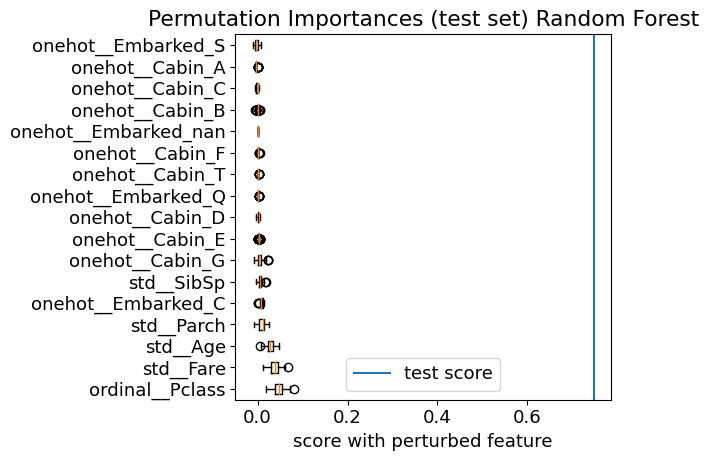

In [52]:
from sklearn.inspection import permutation_importance
import matplotlib.pylab as plt
idx = np.argmax(test_scores_rf)
model_rf = best_models_rf[idx]


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=idx)  
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep_rf = clf.fit_transform(X_train)
X_test_prep_rf = clf.transform(X_test)

res = permutation_importance(model_rf, X_test_prep_rf, y_test.values.ravel(), n_repeats=50,random_state=idx)
scores = res.importances
test_score = test_scores_rf[idx]

sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
sort_idx = sorted_indcs[0:17]

plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(6.4,4.8))
plt.boxplot(scores[sort_idx].T,labels=feature_names[sort_idx],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set) Random Forest")

plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('permutation importance'))
plt.show()


#### Shap global - random forest

(357, 17)
(2, 357, 17)


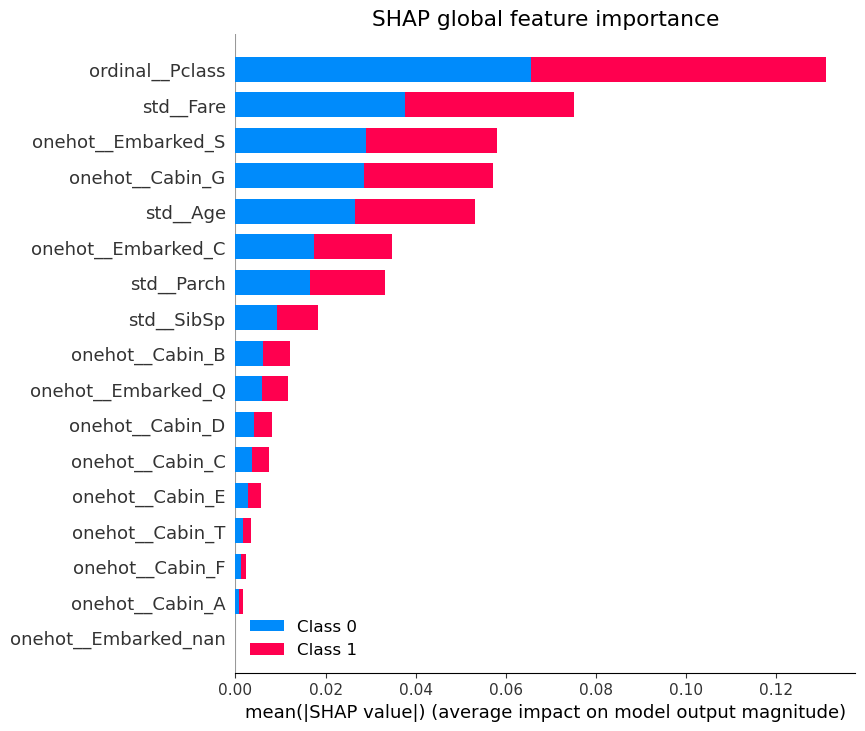

In [53]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(model_rf)
print(np.shape(X_test_prep_rf))
#calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_prep_rf[:357])
print(np.shape(shap_values))
shap.summary_plot(shap_values,X_test_prep_rf,feature_names=feature_names, show = False)
plt.title('SHAP global feature importance')
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('Shap global'))
plt.show()

#### Built-in feature importance - random forest

In [54]:
len(model_rf.feature_importances_)

17

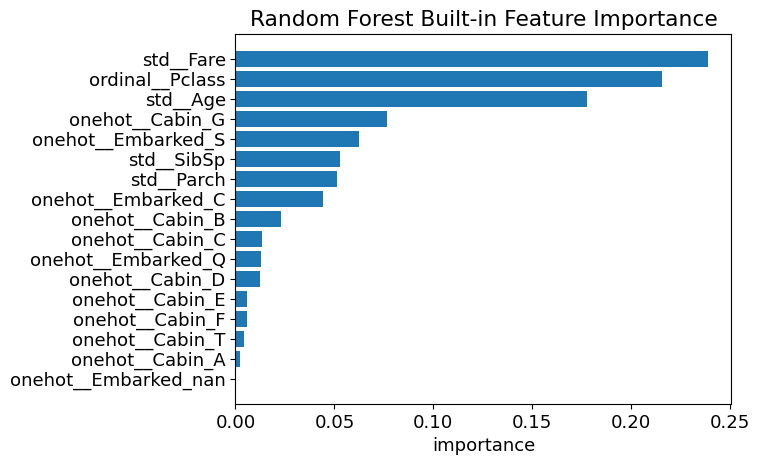

In [55]:
sorted_idx = model_rf.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx],model_rf.feature_importances_[sorted_idx])
plt.title('Random Forest Built-in Feature Importance')
plt.xlabel('importance')
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('built-in'))
plt.show()

#### Permutation importance - Logistic Regression

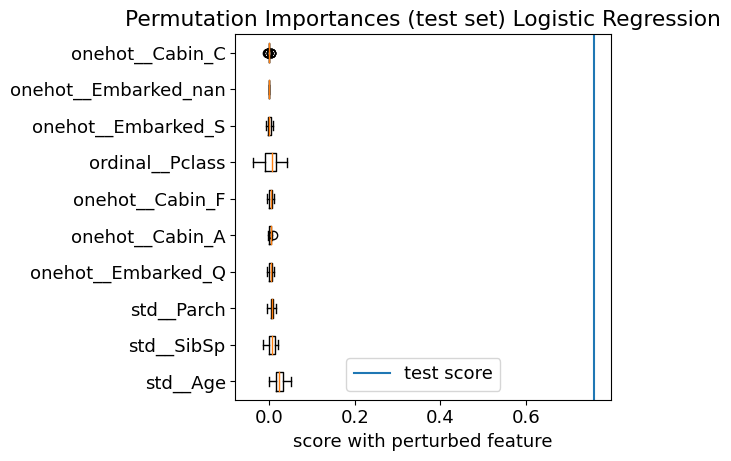

In [56]:
idx = np.argmax(test_scores_lr)
model_lr = best_models[idx]


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=idx)  
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = clf.fit_transform(X_train)
X_test_prep_lr = clf.transform(X_test)

res = permutation_importance(model_lr, X_test_prep, y_test.values.ravel(), n_repeats=50,random_state=idx)
scores = res.importances
test_score = test_scores_lr[idx]

sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
top_ten = sorted_indcs[0:10]

plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(6.4,4.8))
plt.boxplot(scores[top_ten].T,labels=feature_names[top_ten],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set) Logistic Regression")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('logreg permuation importances'))
plt.show()

### Local feature importances

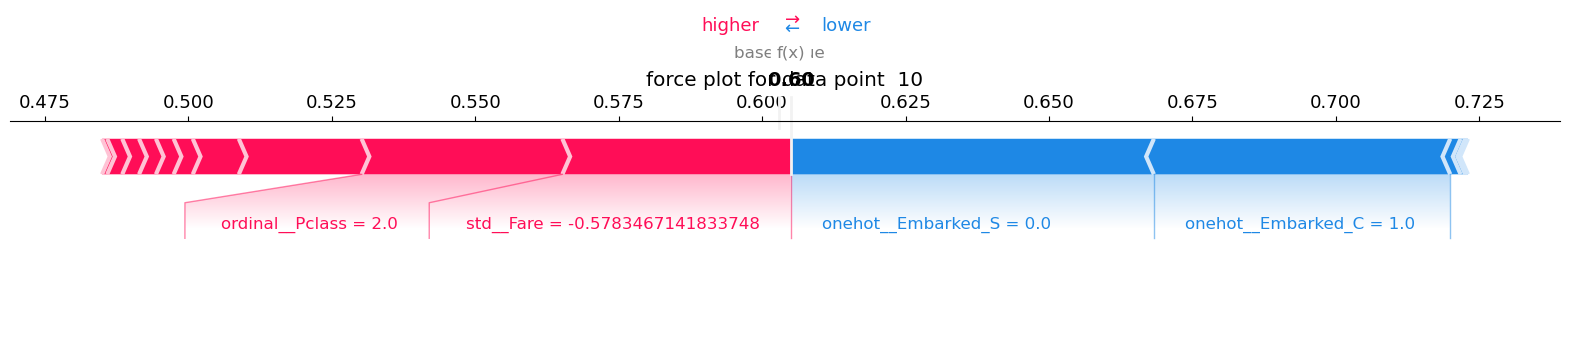

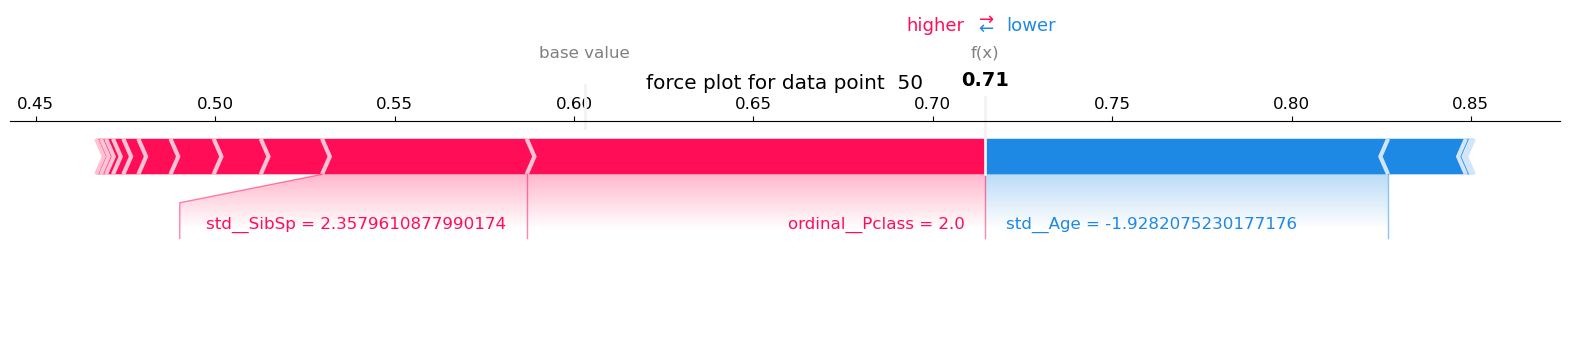

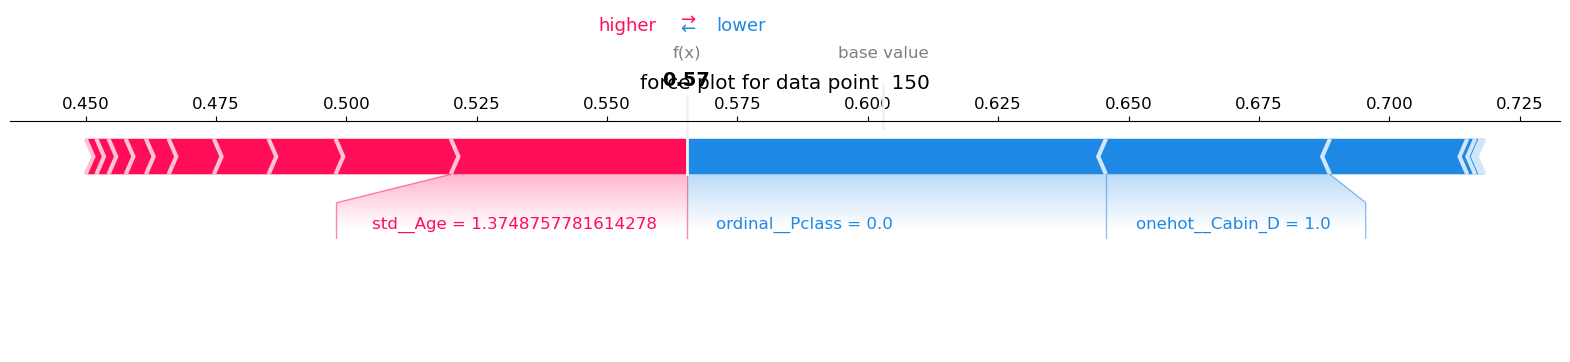

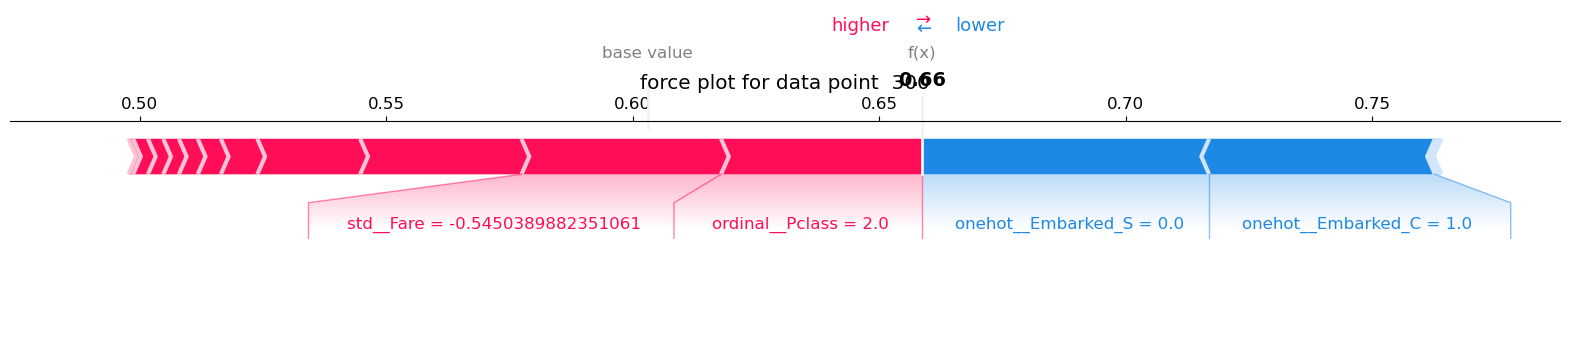

In [57]:
for i in [10,50,150,300]: 
    shap.initjs()
    shap.force_plot(explainer.expected_value[0], shap_values[0][i,:], features = X_test_prep_rf[i,:],feature_names = feature_names,matplotlib=True, show=False,contribution_threshold=0.2)
    plt.rcParams.update({'font.size': 12})
    plt.title('force plot for data point  '+ str(i))
    plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('force plot for data point  '+ str(i)))
    plt.show()

### Confusion Matrix - Random Forest

[[171  56]
 [ 94  36]]


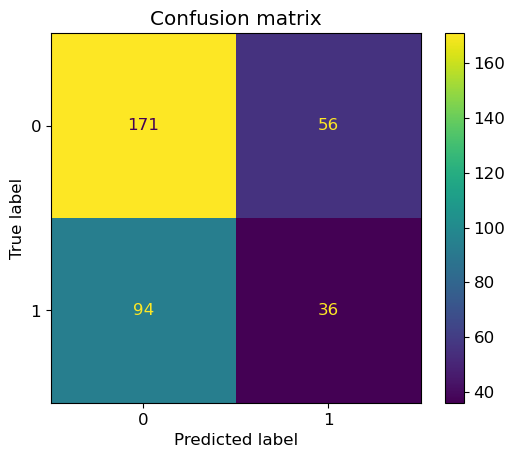

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=5)
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep_rf = clf.fit_transform(X_train)
X_test_prep_rf = clf.transform(X_test)
pred = model_rf.predict(X_test_prep)

cm = confusion_matrix(y_test.values.ravel(), pred)
print(cm)

plot_confusion_matrix(model_rf,X_test_prep,y_test)
plt.title('Confusion matrix')
plt.savefig('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/figures/{}'.format('confusion matrix'))
plt.show()


### Saving results

#### RF

In [59]:
pred_rf = model_rf.predict(X_test_prep_rf)

In [60]:
import joblib
joblib.dump(model_rf,'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf')

['/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf']

In [61]:
prediction_rf = pd.DataFrame(pred_rf, columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf')

In [62]:
predictions = []
for i in range(10):
    tmp_model = best_models_rf[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=i)  
    clf = Pipeline(steps=[('preprocessor', preprocessor)])
    X_train_prep = clf.fit_transform(X_train)
    tmp_X_test = clf.transform(X_test)
    
    tmp_pred = tmp_model.predict(tmp_X_test)
    predictions.append(tmp_pred)

In [63]:
joblib.dump(best_models_rf[0],'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf_0')
prediction_rf_0 = pd.DataFrame(predictions[0], columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf_0')

joblib.dump(best_models_rf[1],'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf_1')
prediction_rf_1 = pd.DataFrame(predictions[1], columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf_1')

joblib.dump(best_models_rf[2],'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf_2')
prediction_rf_2 = pd.DataFrame(predictions[2], columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf_2')

joblib.dump(best_models_rf[3],'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf_3')
prediction_rf_3 = pd.DataFrame(predictions[3], columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf_3')

joblib.dump(best_models_rf[4],'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf_4')
prediction_rf_4 = pd.DataFrame(predictions[4], columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf_4')

joblib.dump(best_models_rf[6],'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf_6')
prediction_rf_6 = pd.DataFrame(predictions[6], columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf_6')

joblib.dump(best_models_rf[7],'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf_7')
prediction_rf_7 = pd.DataFrame(predictions[7], columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf_7')

joblib.dump(best_models_rf[8],'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf_8')
prediction_rf_8 = pd.DataFrame(predictions[8], columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf_8')

joblib.dump(best_models_rf[9],'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_rf_9')
prediction_rf_9 = pd.DataFrame(predictions[9], columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_rf_9')


#### LR

In [64]:
pred_lr = model_lr.predict(X_test_prep_lr)
joblib.dump(model_lr,'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_lr')
prediction_lr = pd.DataFrame(pred_lr, columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_lr')

#### KNN

In [65]:
test_scores_knn

[0.7338935574229691,
 0.6862745098039216,
 0.7170868347338936,
 0.6890756302521008,
 0.7535014005602241,
 0.7254901960784313,
 0.7394957983193278,
 0.6946778711484594,
 0.7030812324929971,
 0.6918767507002801]

In [66]:
idx = np.argmax(test_scores_knn)
model_knn = best_models_knn[idx]


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=idx)  
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = clf.fit_transform(X_train)
X_test_prep_knn = clf.transform(X_test)

pred_knn = model_knn.predict(X_test_prep_knn)
joblib.dump(model_lr,'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_knn')
prediction_lr = pd.DataFrame(pred_knn, columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_knn')


#### SVM

In [67]:
idx = np.argmax(test_scores_svm)
model_svm = best_models_svc[idx]


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.6,random_state=idx)  
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = clf.fit_transform(X_train)
X_test_prep_svm = clf.transform(X_test)

pred_svm = model_knn.predict(X_test_prep_svm)
joblib.dump(model_svm,'/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/model_svm')
prediction_svm = pd.DataFrame(pred_svm, columns=['predictions']).to_csv('/Users/ellaliang/Desktop/DATA1030-Fall2022/titanic/results/pred_svm')
